In [5]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy.stats
from scipy.spatial import Voronoi, voronoi_plot_2d


# Quantification d'une loi continue

Objectif : Minimiser la distortion

### 1. Implémentation de la méthode de Lloyd pour la recherche des N centroïdes des cellules de Voronoï. (dim=1)

On définit ci-dessous la fonction plus proche qui va calculé l'indice du centroïde le plus proche d'un point $X_{i}$ de notre échantillon $X_{cible}$.

Cette fonction nous sera très utile car elle permet de calculer l'indice du centre le plus proche d'un point en fonction d'une liste de centres que l'on peut actualiser au fur et à mesure.

Le principe est le suivant:

* Initialisation: on initialise la distance minimal courante au float le plus large et l'indice à -1. Si on le retrouve en sortie d'algorithme on pourra voir s'il y a un problème.

* Boucle sur la liste des centroïde: 
    1. On calcule la distance au centre de la cellule $C_{i}$ 
    2. On regarde si elle est plus petite que la distance minimale courante
    3. On associe l'indice à l'indice courant de la boucle si la condition est vérifiée.





In [6]:

def plusproche(Xi,lst_centre):
    """

    Entrée:
        Xi: Point i de notre échantillon cible parmis n points
        lst_centre: Liste des N-quantificateurs au moment de l'appel de la fonction


    Sortie:
        indice: indice du centroïde le plus proche
        dist_min: distance entre le point et le centre le plus proche

    """
    dist_min_cour=float('inf') # initialisation de dist_cour arbitrairement grand pour simplifier la règle de décision
    indice=-1 


    for i,ci in enumerate(lst_centre): # enumerate nous permet d'avoir accès au compteur et à l'objet itéré
        dist=np.abs(Xi-ci)**2 # Pour le cas muiltidimensionnel on remplace cette ligne par "dist=np.linalg.norm(Xi-ci)**2"
        if(dist<dist_min_cour):
            dist_min_cour=dist
            indice=i

    return indice,dist_min_cour
    
        

Remarques: 
* On choisit ici de calculer les distances avec $ | X_{i} - C_{i} |^{2} \ $ en dimension plutôt que la fonction np.linalg.norm car celle-ci rallonge considérablement les calculs.
* Cependant dans le cadre multidimensionnel, il faudra utiliser np.linalg.norm.

In [73]:
def kmeans_Lloyd(X,N,kmax=300):
    
    """
    Entrée:
        X: Echantillon de taille n x m suivant une densité f cible
        N: Nombre de quantificateur:
        kmax: nombre d'itération max
    
    Sortie:
        lst_centre: liste finale des centroïdes
        lst_proba: liste des probabilités associées aux centres
        dist_tab: Tableau de l'évolution de la distortion


    """


    # Initialisation pour éviter les problèmes d'affectations
    X_cible=np.copy(X) # On récupère la taille de l'échantillon
    n=len(X_cible)
    #lst_centre=npr.choice(X_cible,N) # N points choisis aléatoirement parmis l'échantillon
    lst_centre=npr.normal(0,1,N)
    lst_centre=np.sort(lst_centre) # Tri des centres pour minimiser le problème de quantificateur isolée auquel aucun point n'est associé

    dist_tab=[] # Récupération de l'évolution de la distortion

    for it in range(kmax):
    # Initialisation des variables courantes à l'itération it
        Assignation_cour=np.zeros(N)  # pour une version multidimensionelle on peut remplacer la ligne par " Assignation_cour=np.zeros((N,X_cible.shape[1]))"
        compteur_cour=np.zeros(N)
        dist_total_it=0

        for x in X_cible:
            indice,dist_x=plusproche(x,lst_centre)

            # Actualisation des variables courante pour calculer le nouveau centre associé aux indices et de la distortion
            Assignation_cour[indice]=Assignation_cour[indice]+x
            compteur_cour[indice]+=1
            dist_total_it+=dist_x

        # Actualisation des centres
        for i in range(N):
            if(compteur_cour[i]>0):
                lst_centre[i]=Assignation_cour[i]/compteur_cour[i]
            else:
                lst_centre=lst_centre

        dist_tab.append(dist_total_it/(n))

    # Calcul des proba de chaque cellules
    lst_proba=compteur_cour/n

    return lst_centre, lst_proba, dist_tab


In [71]:
#n=1000
#N=20
#X_cible=npr.rand(n)

#lst_centre_u_1d, lst_proba_u_1d, dist_tab_u_1d=kmeans_Lloyd(X=X_cible,N=N,kmax=100)

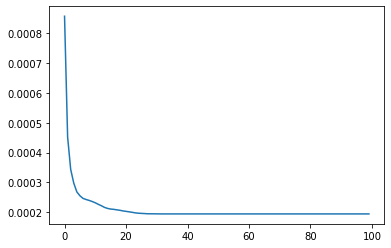

In [72]:
#plt.plot(dist_tab_u_1d)

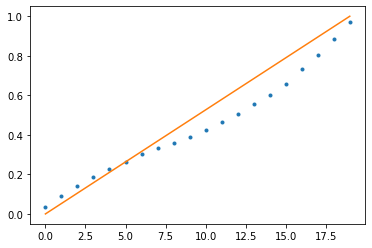

In [40]:
#plt.plot(lst_centre_u_1d,'.')
#x=np.linspace(0,1,N)
#plt.plot(x)
#plt.show()

In [74]:
n=1000
N=10
X_cible=npr.normal(0,1,n)

lst_centre_n_1d, lst_proba_n_1d, dist_tab_n_1d=kmeans_Lloyd(X=X_cible,N=N,kmax=300)

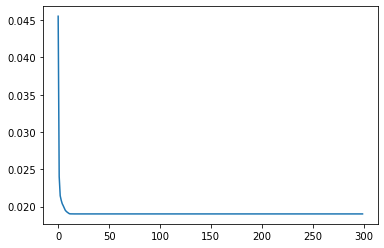

In [75]:
plt.plot(dist_tab_n_1d)


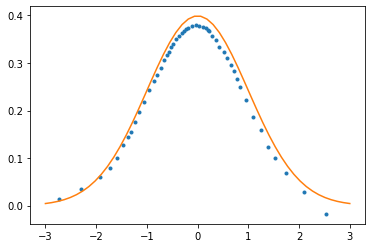

In [13]:
y=np.cumsum(lst_centre*-lst_proba)

plt.plot(lst_centre,y,'.')

x=np.linspace(-3,3,N)
z=scipy.stats.norm.pdf(x,0,1)
plt.plot(x,z)
plt.show()

In [14]:
vor1=Voronoi(points=lst_centre)


IndexError: tuple index out of range

In [ ]:
y=np.cumsum(lst_proba)
y

array([0.01 , 0.025, 0.052, 0.075, 0.107, 0.143, 0.173, 0.195, 0.218,
       0.244, 0.265, 0.294, 0.315, 0.331, 0.35 , 0.368, 0.399, 0.427,
       0.446, 0.465, 0.483, 0.494, 0.503, 0.513, 0.528, 0.547, 0.564,
       0.58 , 0.599, 0.618, 0.641, 0.658, 0.673, 0.69 , 0.71 , 0.721,
       0.733, 0.743, 0.765, 0.795, 0.825, 0.849, 0.879, 0.893, 0.908,
       0.933, 0.96 , 0.977, 0.991, 1.   ])

### MULTIDIMENSIONNEL

In [44]:
def plusproche_d(Xi,lst_centre):
    """

    Entrée:
        Xi: Point i de notre échantillon cible parmis n points
        lst_centre: Liste des N-quantificateurs au moment de l'appel de la fonction


    Sortie:
        indice: indice du centroïde le plus proche
        dist_min: distance entre le point et le centre le plus proche

    """
    dist_min_cour=float('inf') # initialisation de dist_cour arbitrairement grand pour simplifier la règle de décision
    indice=-1 


    for i,ci in enumerate(lst_centre): # enumerate nous permet d'avoir accès au compteur et à l'objet itéré
        dist=np.linalg.norm(Xi-ci)**2 
        if(dist<dist_min_cour):
            dist_min_cour=dist
            indice=i

    return indice,dist_min_cour
    

In [137]:
def kmeans_Lloyd_d(X,n,N,centroides,kmax=300):
    
    """
    Entrée:
        X: Echantillon de taille n x m suivant une densité f cible
        N: Nombre de quantificateur:
        kmax: nombre d'itération max
    
    Sortie:
        lst_centre: liste finale des centroïdes
        lst_proba: liste des probabilités associées aux centres
        dist_tab: Tableau de l'évolution de la distortion


    """


    # Initialisation pour éviter les problèmes d'affectations
    X_cible=np.copy(X) # On récupère la taille de l'échantillon
    lst_centre=centroides # size = [N,d] pour la dimension d
    

    dist_tab=[] # Récupération de l'évolution de la distortion

    for it in range(kmax):
    # Initialisation des variables courantes à l'itération it
        Assignation_cour=np.zeros((N,2)) # idem que pour lst_centre
        compteur_cour=np.zeros(N)
        dist_total_it=0

        for x in X_cible:
            indice,dist_x=plusproche_d(x,lst_centre)

            # Actualisation des variables courante pour calculer le nouveau centre associé aux indices et de la distortion
            Assignation_cour[indice]=Assignation_cour[indice]+x
            compteur_cour[indice]+=1
            dist_total_it+=dist_x

        # Actualisation des centres
        for i in range(N):
            if(compteur_cour[i]>0):
                lst_centre[i]=Assignation_cour[i]/compteur_cour[i]
            else:
                lst_centre=lst_centre

        dist_tab.append(dist_total_it/(2*n))

    # Calcul des proba de chaque cellules
    lst_proba=compteur_cour/n

    return lst_centre, lst_proba, dist_tab


In [138]:
n=1000
N=50
X_cible=npr.normal(0,1,size=[n,2])
centroides=npr.normal(0,1,size=[N,2])
lst_centre_n_2d, lst_proba_n_2d, dist_tab_n_2d=kmeans_Lloyd_d(X_cible,n,N,centroides,300)

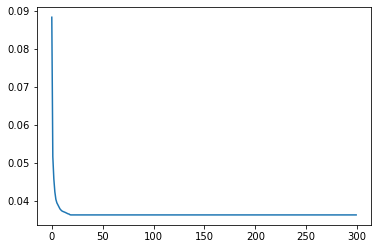

In [139]:
plt.plot(dist_tab_n_2d)


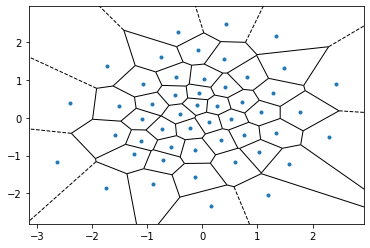

In [103]:
vor=Voronoi(lst_centre_n_2d)
fig = voronoi_plot_2d(vor,show_vertices=False)
plt.show()

1. Item 1
2. Item 2 ( we can type 1. and the markdown will automatically numerate them) 
* First Item
  * Nested item 1
  * Nested item 2
    1. Keep going
    1. Yes
  
* Second Item
- First Item
- Second Item

Gradient à pas déterministe:

On ne mets pas l'échantillon X en paramètre de la fonction parce que nous l'initialisons à l'intérieur de l'algorithme puisque nous allons nous concentrer sur la loi normale en dimension $d>=1$

In [59]:
def grad_list(lst_centre):    
    N=len(lst_centre)
    grad=np.zeros(N)
    phi_plus=np.zeros(N)
    phi_moins=np.zeros(N)
    densi_plus=np.zeros(N)
    densi_moins=np.zeros(N)
    
    #On s'occupe d'abord des bords de la liste comme on actualise centre par rapport au précedent et au suivant dans la liste 
    
    grad[0]=lst_centre[0]*(scipy.stats.norm.cdf((lst_centre[0]+lst_centre[1])/2))+scipy.stats.norm.pdf((lst_centre[0]+lst_centre[1])/2)
    grad[N-1]=-lst_centre[N-1]*scipy.stats.norm.cdf((lst_centre[N-1]+lst_centre[N-2])/2)-scipy.stats.norm.pdf((lst_centre[N-1]+lst_centre[N-2])/2)
    
    for i in range(1,N-1):
        phi_plus[i]=scipy.stats.norm.cdf((lst_centre[i]+lst_centre[i+1])/2)
        phi_moins[i]=scipy.stats.norm.cdf((lst_centre[i]+lst_centre[i-1])/2)
        densi_plus[i]=scipy.stats.norm.pdf((lst_centre[i]+lst_centre[i+1])/2)
        densi_moins[i]=scipy.stats.norm.pdf((lst_centre[i]+lst_centre[i-1])/2)
        
        
    grad=lst_centre*(phi_plus-phi_moins)+densi_plus-densi_moins
    return grad

In [ ]:
def method_Grad_normal(X,N,gammainit,kmax=300,tol=5e-1):
    # Initialisation pour éviter les problèmes d'affectations
    X_cible=np.copy(X)
    lst_centre=npr.normal(0, 1, N)
    lst_centre = np.sort(lst_centre)
    dist_cour=1
    dist_tab=[] # Récupération de l'évolution de la distortion
    compteur_cour=np.zeros(N)
    it=1
    
    while(it<kmax and dist_cour>tol):
        compteur_cour=np.zeros(N)
        dist_cour=0
        gamma=gammainit
        lst_centre=lst_centre-gamma*grad_list(lst_centre)
        
        for x in X_cible:
            indice,dist_x=plusproche(x,lst_centre)
            dist_cour=dist_cour+dist_x
            compteur_cour[indice]+=1
        dist_tab.append(dist_cour/n)
        it+=1        
    lst_proba=compteur_cour/n
    if(it==kmax):
        print("itération max atteinte")
    return lst_centre,lst_proba,dist_tab

In [ ]:
npr.seed(200)
n=1000
N=10
X_cible=npr.normal(0,1,n)

lst_centre_grad, lst_proba_grad, dist_tab_grad=method_Grad_normal(X_cible,N,0.9,kmax=300)

itération max atteinte


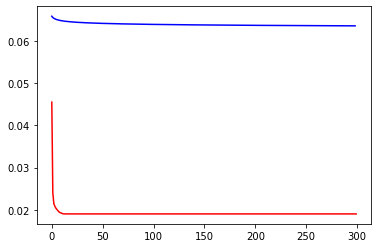

In [ ]:
plt.plot(dist_tab_grad,color='blue')
plt.plot(dist_tab_n_1d,color='red')

In [130]:
def CLVQ_normal(X,n,N,gamma,kmax=3000):
    X_cible=np.copy(X) # On récupère la taille de l'échantillon
    lst_centre=npr.normal(0, 1, size=[N, 2])
    gamma0=gamma

    dist_tab=[] # Récupération de l'évolution de la distortion

    for it in range(1,kmax):
    # Initialisation des variables courantes à l'itération it
        Assignation_cour=np.zeros((N,2)) 
        compteur_cour=np.zeros(N)
        dist_total_it=0
        
        #Phase de compétition
        for x in X_cible:
            indice,dist_x=plusproche_d(x,lst_centre)
            #Phase d'apprentissage            
            lst_centre[indice]=lst_centre[indice]-gamma0/it*(lst_centre[indice]-x)
            # Actualisation des variables courante pour calculer le nouveau centre associé aux indices et de la distortion
            compteur_cour[indice]+=1
            dist_total_it+=dist_x

        dist_tab.append(dist_total_it/(2*n))

    # Calcul des proba de chaque cellules
    lst_proba=compteur_cour/n

    return lst_centre, lst_proba, dist_tab


In [131]:
n=1000
N=50
X_cible=npr.normal(0,1,n)

lst_centre_clvq, lst_proba_clvq, dist_tab_n_clvq=CLVQ_normal(X_cible,n,N,1,10000)

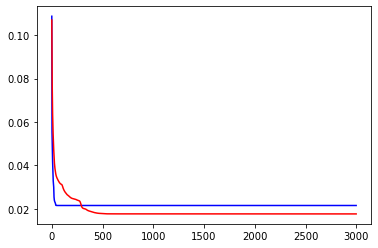

In [132]:
plt.plot(dist_tab_n_2d,color="blue")
plt.plot(dist_tab_clvq,color="red")

In [140]:
lst_centre_clvq2,lst_proba_clvq2,dist_tab_clvq2=kmeans_Lloyd_d(X_cible,n,N,lst_centre_clvq)

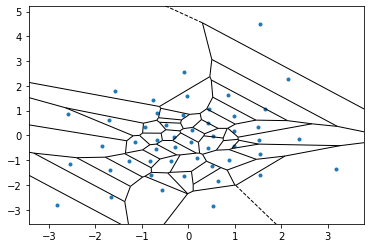

In [142]:
vor3=Voronoi(lst_centre_clvq2)
fig = voronoi_plot_2d(vor2,show_vertices=False)
plt.show()

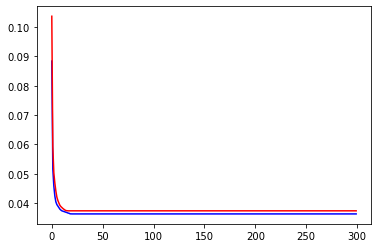

In [141]:
plt.plot(dist_tab_n_2d,color="blue")
plt.plot(dist_tab_clvq2,color="red")

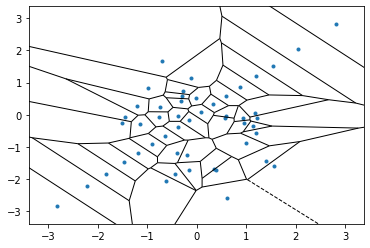

In [133]:
vor2=Voronoi(lst_centre_clvq)
fig = voronoi_plot_2d(vor2,show_vertices=False)
plt.show()